In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PointTracking_v2 import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe
from itertools import combinations 
from matplotlib import animation

from scipy.cluster.vq import vq

Total Imag Time:  1.3241453170776367
kmax:  4.0212385965949355
T:  4.042589962686201
(401, 128, 128)
(1, 128, 128)


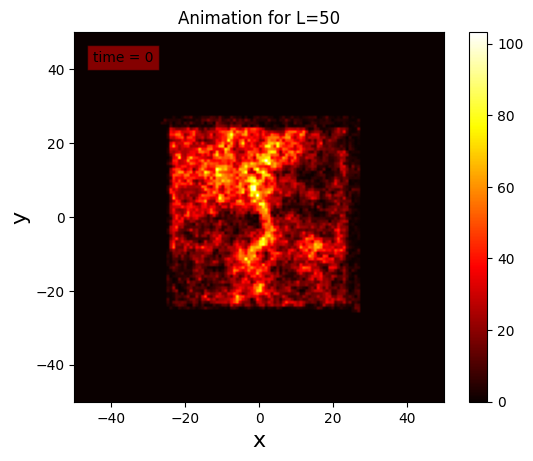

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 100000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 0.5, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)

In [4]:
print(np.shape(g.snaps))


(401, 128, 128)


In [5]:
# look at individual frames and see how the tracker detects the vortices vs. the circulation plot
s = -1
vortex, antiv, circulation = pt.detectVortices(tracker, g.snaps[s])


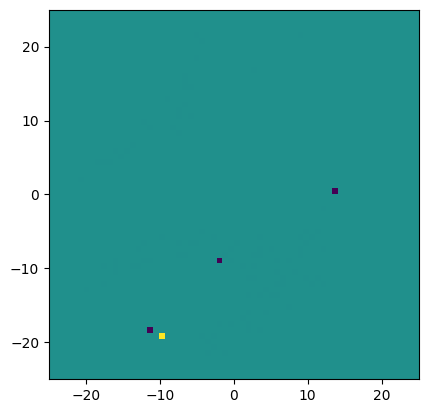

In [8]:
plt.figure() 
plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower') 
# for i in range(len(antiv)): 
#     plt.scatter(*antiv[i]-g.L/2)

# plt.xlim(-10,10)
# plt.ylim(-10,10)

plt.show() 

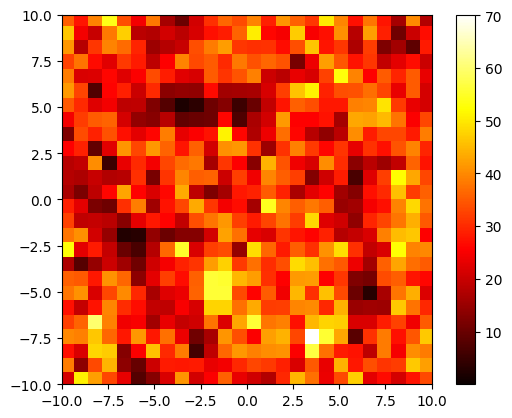

In [7]:
plt.figure() 
plt.imshow(np.abs(g.snaps[s])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower', cmap = plt.cm.hot)
plt.colorbar() 
plt.scatter(*antiv[0]-g.L/2, s = 30, color = 'blue', alpha = 0.3)
plt.scatter(*antiv[1]-g.L/2, s = 30, color = 'blue', alpha = 0.3)

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show() 

In [4]:
# v_traj, antiv_traj, circ_array = pt.labelVortices(tracker, getCirc = True) 
# v_traj = np.array(v_traj) 
# antiv_traj = np.array(antiv_traj) 

In [ ]:
# plot labels 


In [9]:
# s = 84
# vortex, antiv, circulation = pt.detectVortices(tracker, g.snaps[s])
# plt.figure() 
# plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower') 
# for i in range(len(antiv_traj)): 
#     print(i)
#     plt.scatter(*antiv_traj[i][s]-g.L/2, s = 30, alpha = 0.7)
# plt.xlim(-5,5)
# plt.ylim(-5,5)
# plt.show() 

In [9]:
def labelVortices(self, getCirc = False): 
    # loop through each of the frames of the simulation 
    circ = []
    for i in range(1,len(self.psi_snaps)//4):  
        # find the vortex and anti-vortex positions           
        vortex_positions, anti_vortex_positions, circulation = self.detectVortices(self.psi_snaps[i]) # this can be the features
         
        
        # find active point coordinates 
        active_vortex_coors, active_antivortex_coors = self.getVAntiVInfo() # this can be the codebook 
        # print(active_antivortex_coors)
        # if i%10 == 0: 
        #     print(i)
        #     plt.figure() 
        #     plt.imshow(circulation, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2], origin = 'lower')
        #     for i in range(len(anti_vortex_positions)): 
        #         plt.scatter(*anti_vortex_positions[i]-self.L/2, s = 30, alpha = 0.3)
        #     for j in range(len(active_antivortex_coors)): 
        #         plt.scatter(*np.array(active_antivortex_coors)[j]-self.L/2, s = 30, alpha = 0.5, color = 'black')
        #     plt.show()

        if len(active_vortex_coors) > 0 and len(vortex_positions)>0: 
            vortices_closest_index, distances_v = vq(active_vortex_coors, vortex_positions)
            # merge options where there are multiple of the same index: is this causing the index error issue?? 



            # for now, assume all unique indices 
            for i in range(len(active_vortex_coors)): 
                index_of_match = vortices_closest_index[i] # get the ith index 
                detected_coordinate_match = vortex_positions[index_of_match]
                self.vortices[i].addCoor(*detected_coordinate_match)

                #print("Vortex Trajectory: ", self.vortices[i].getTrajectory())

            
        if len(active_antivortex_coors)>0 and len(anti_vortex_positions) > 0 : 
            antivortices_closest_index, distances_av = vq(active_antivortex_coors, anti_vortex_positions) 

            for i in range(len(active_antivortex_coors)): 
                index_of_match = antivortices_closest_index[i] 
                print("Index of Match: ", index_of_match)
                detected_coordinate_match = anti_vortex_positions[index_of_match]
                # the following line might be the issue - finding and adding new vortices might cause the vortices to shift indices? 
                self.antivortices[i].addCoor(*detected_coordinate_match)
                #print("AntiVortex Trajectory: ", self.antivortices[i].getTrajectory())
            print("")
        if getCirc: 
            circ.append(circulation)

        #print("")
    v_traj = [] 
    av_traj = [] 
    for i in range(len(self.vortices)): 
        v_traj.append(self.vortices[i].getTrajectory()) 
    for j in range(len(self.antivortices)): 
        av_traj.append(self.antivortices[j].getTrajectory())
    if getCirc: 
        return v_traj, av_traj, circ
    
    return v_traj, av_traj

In [10]:
for i in range(len(tracker.antivortices)): 
    print(tracker.antivortices[i].getCoors())

(23.828125, 24.609375)
(28.515625, 25.390625)
(41.015625, 25.390625)


In [11]:
v_traj, av_traj = labelVortices(tracker)
# the directory of active points is copied! 

Index of Match:  0
Index of Match:  1
Index of Match:  2

Index of Match:  0
Index of Match:  1
Index of Match:  2

Index of Match:  0
Index of Match:  2
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  1
Index of Match:  3
Index of Match:  3

Index of Match:  1
Index of Match:  2
Index of Match:  2

Index of Match:  1
Index of Match:  2
Index of Match:  2

Index of Match:  1
Index of Match:  2
Index of Match:  2

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  1
Index of Match:  1

Index of Match:  0
Index of Match:  2
Index of Match:  2

Index of Match:  0
Index of Match:  2
Index of Match:  2

Index of Match

In [12]:
antiv_traj_arr = av_traj
vortex_traj_arr = v_traj

In [13]:
# distance 
vortex_combos = np.array(list(combinations(av_traj, 2))) # specifically for the antivortex case.... lacking for the vortex/antivortex pair case... 

distance_arr = np.zeros((len(vortex_combos), len(g.snaps)))
angle_arr = np.zeros((len(vortex_combos), len(g.snaps))) 

for i, pair in enumerate(vortex_combos): # for each pair - find the distance 
    for j in range(len(vortex_combos[0][0])): 
    #for j in range(280,290):
 
        
        point1 = pair[0][j] 
        point2 = pair[1][j] 
        xsep = point1[0] - point2[0] 
        ysep = point1[1] - point2[1] 
        dist = np.sqrt(np.abs(point1[0] - point2[0])**2 + np.abs(point1[1] - point2[1])**2) 
        ang = np.arctan(ysep/xsep) 

        distance_arr[i,j] = dist 
        angle_arr[i,j] = ang

C:\Users\TQC User\AppData\Local\Temp\ipykernel_22972\2611062425.py:17: RuntimeWarning: invalid value encountered in scalar divide
  ang = np.arctan(ysep/xsep)


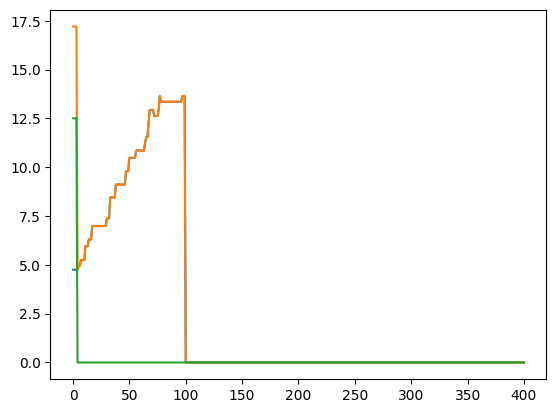

In [14]:
# plot the angle and distance trajectory? 
plt.figure() 
for i in range(len(distance_arr)):
    plt.plot(distance_arr[i])
plt.show() 

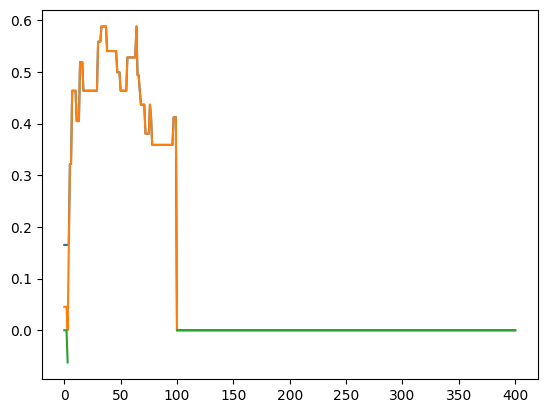

In [15]:
plt.figure() 
for i in range(len(angle_arr)):
    plt.plot(angle_arr[i])
plt.show() 

In [16]:
def animatepsi(filename): 
    '''
    Animates the density distribution for the 
    '''
    time_tracking = np.arange(0, len(g.snaps))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot, origin = 'lower')
    plt.colorbar() 
    L = g.L 
    vort_arr = [] 
    
    for i in range(len(antiv_traj_arr)): 
         avi_traj = antiv_traj_arr[i] 
         v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
         vort_arr.append(v) 


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(np.abs(g.snaps[i])**2)

        for j in range(len(vort_arr)): 
             vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i])  

        return data, time_text, *vort_arr
    anim = animation.FuncAnimation(fig, animate, frames = len(g.snaps), blit = True)
    anim.save(path)
    #plt.show() 

    return anim

(3,)


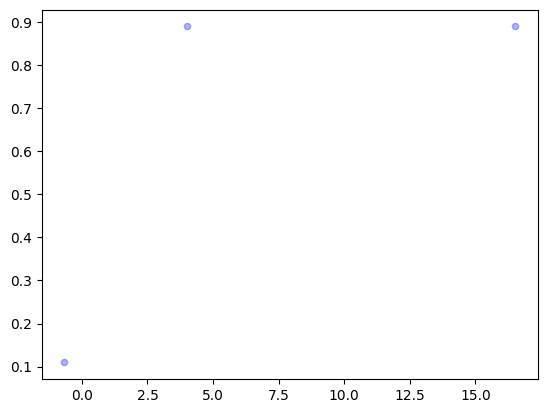

In [20]:
vort_arr = [] 
    
for i in range(len(antiv_traj_arr)): 
    avi_traj = antiv_traj_arr[i] 
    v = plt.scatter(avi_traj[0][0]+0.5-g.L/2, avi_traj[0][1]+0.5-g.L/2, alpha = 0.3, s = 20, color = 'blue')
    vort_arr.append(v)
print(np.shape(vort_arr))

IndexError: index 100 is out of bounds for axis 0 with size 100

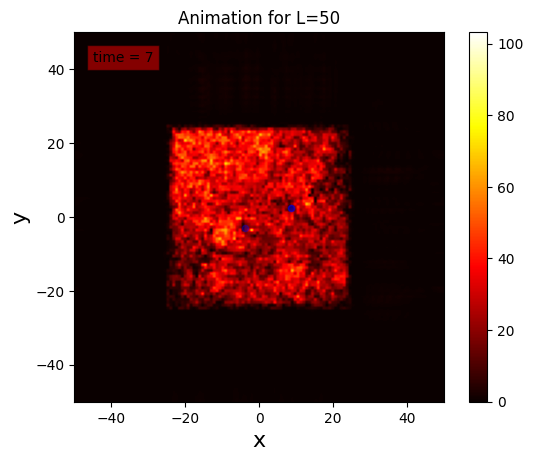

In [17]:
animatepsi('debugtest.mp4')

In [14]:
print(len(g.snaps)//4)

100


In [17]:

nc = g.T/(2*np.pi)*np.log(380/g.gpeobj.g)
print(1/g.gpeobj.g)
print(2*np.pi*25/(np.log(380/g.gpeobj.g)))
print(17.1/g.T)

25.6
17.105921425173467
4.2299615241308
